## Model Task One

In [1]:
# Import modules you will need for the project:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data to appropriate objects

M_13_data     = np.genfromtxt('M13.csv',delimiter=',',skip_header=1)
NGC_2420_data = np.genfromtxt('NGC2420.csv',delimiter=',',skip_header=1)
NGC_6791_data = np.genfromtxt('NGC6791.csv',delimiter=',',skip_header=1)

In [3]:
# Find the number of columns and rows in each

print(np.shape(M_13_data),' M_13_data')
print(np.shape(NGC_2420_data),' NGC_2420_data')
print(np.shape(NGC_6791_data),' NGC_6791_data')

((25240, 13), ' M_13_data')
((3071, 13), ' NGC_2420_data')
((10423, 13), ' NGC_6791_data')


In [4]:
# A different way of generating data:

with open('M13.csv','r') as M_13:
    headers = M_13.readline().rstrip()

    
# To obtain the individual headers, we split the headers list at ','

headers = headers.split(',')

# All of the headers are the same between the files
# we can just do this once for all of them

In [5]:
headers
#Demonstrating we have imported the headers correctly.

['DAOPHOTID',
 'RA',
 'DEC',
 'u',
 'uError',
 'g',
 'gError',
 'r',
 'rError',
 'i',
 'iError',
 'z',
 'zError']

## Model Task Two

In [6]:
# find the position of g and r in the columns list by indexing our headers:

g_ind = headers.index('g')
r_ind = headers.index('r')

In [7]:
# Use these header indexes to find the data in the large arrays

g_M_13     = M_13_data[:,g_ind]
r_M_13     = M_13_data[:,r_ind]

g_NGC_2420 = NGC_2420_data[:,g_ind]
r_NGC_2420 = NGC_2420_data[:,r_ind]

g_NGC_6791 = NGC_6791_data[:,g_ind]
r_NGC_6791 = NGC_6791_data[:,r_ind]

## Model Task Three 

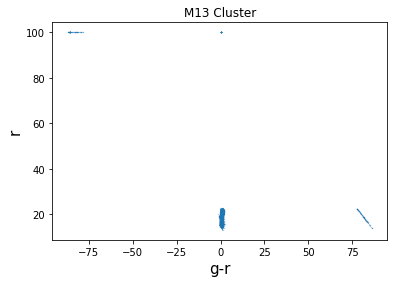

In [8]:
# Produce g-r array

g_r_M13 = g_M_13-r_M_13

# Plot: M_13 using matplotlib.pyplot.scatter

plt.scatter(g_r_M13,r_M_13,s=0.02)

#Here we are setting our limits on the x-axis.
#plt.xlim(-1,2)
#Here we are setting our limits on the y-axis.
#plt.ylim(12,23)
#Here we set the x-axis label.
plt.xlabel('g-r',fontsize=15)
#Here we set the y-axis label.
plt.ylabel('r',fontsize=15)
#Here we give our diagram a title.
plt.title('M13 Cluster')

### Hidden Additional Task Model Solution

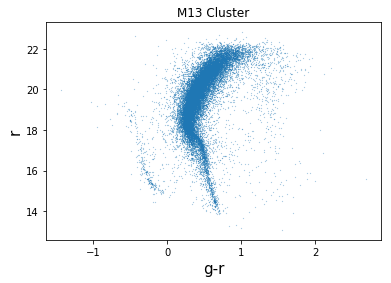

In [9]:
# Oops! There appears to be spurious data. In astronomy this happens a lot. Some data are not resolvable in certain filters in the SDSS telescope data.
# If a star's light is not bright enough for the telescope and filter used, it will blend with the background noise. 
# When this happens, the programmed "pipeline" (a piece of code that puts the observation data into an accessible format), will assign an unrealistic value (e.g. 99.99).

# We need to correct for this and remove the g-r values >50 and <-50. A simple way to do this is to use a numpy module called "where".
# "numpy.where()" allows us to write conditional boolean logic statements to produce an array of indicies where the conditions are met.
# For example if we have, testar = np.array([some values]), then we write condition = np.where(testar <= 10.0).
# The output of the array named"condition" will be a series of numbers that represent indicies of an array.
# So, if I were to print(testar[condition]), this will output the testar array where values are <= 10.0.

#Therefore

spurious_g13 = np.where(g_M_13 < 90.0) 

#Then, remake the arrays of our plot by reassigning the variables as below for g

g_M_13 = g_M_13[spurious_g13]
r_M_13 = r_M_13[spurious_g13]

#Now for r

spurious_r13 = np.where(r_M_13 < 90.0)

g_M_13 = g_M_13[spurious_r13]
r_M_13 = r_M_13[spurious_r13]

#Reassign g-r array

g_r_M13 = g_M_13 - r_M_13

#Now, let's try the plot again...

plt.scatter(g_r_M13,r_M_13,s=0.02)
#Here we set the x-axis label.
plt.xlabel('g-r',fontsize=15)
#Here we set the y-axis label.
plt.ylabel('r',fontsize=15)
#Here we give our diagram a title.
plt.title('M13 Cluster')

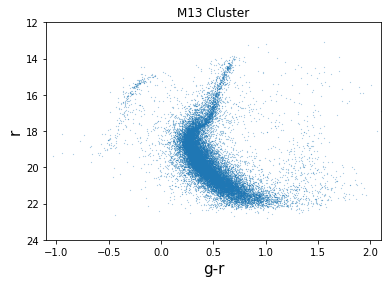

In [10]:
# Success!... Now, the published M13 colour-magnitude diagram looks a bit different to this.

#The reason is that magnitudes are logarithmic and are based upon differences in brightness from a reference star (Vega).
#Therefore a mag = -10 star is brighter than a mag = -2, and even brighter than mag = 5

plt.scatter(g_r_M13,r_M_13,s=0.02)

#Assigning an x-limit
plt.xlim(-1.1,2.1)
#Assigning the y-limit...
#Here we also invert the y-axis to make it easier to show brighter objects on the plot (i.e brighter towards the top of the diagram)
plt.ylim(24.0,12.0) 
plt.xlabel('g-r',fontsize=15)
plt.ylabel('r',fontsize=15)
plt.title('M13 Cluster')
#Below, we now have a colour-magnitude diagram that is easier to read/interpret. 
#Notice the 'kink' at r ~ 18? 
#This is known as the 'Turn-off', where stars leave their main sequence phase and progress onto the red giant phase.
#This feature is commonly associated with 'Globular Clusters', star clusters that consist of old stellar populations.

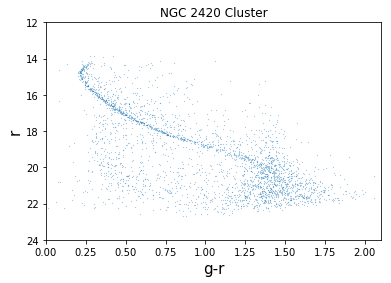

In [11]:
# Plot: NGC_2420

#Same as M13, we remove the spurious data.

spurious_g24 = np.where(g_NGC_2420 < 90.0) 

#Then, remake the arrays of our plot by reassigning the variables as below for g

g_NGC_2420 = g_NGC_2420[spurious_g24]
r_NGC_2420 = r_NGC_2420[spurious_g24]

#Now for r

spurious_r24 = np.where(r_NGC_2420 < 90.0)

g_NGC_2420 = g_NGC_2420[spurious_r24]
r_NGC_2420 = r_NGC_2420[spurious_r24]

#Reassign g-r array

g_r_NGC_2420 = g_NGC_2420-r_NGC_2420

plt.scatter(g_r_NGC_2420,r_NGC_2420,s=0.02)

plt.xlim(0.0,2.1)
plt.ylim(24.0,12.0)
plt.xlabel('g-r',fontsize=15)
plt.ylabel('r',fontsize=15)
plt.title('NGC 2420 Cluster')

#Notice how that kink is not present like M13?  
#This is due to the stellar population of NGC2420, an 'Open Cluster' of stars, consisting of a younger population.

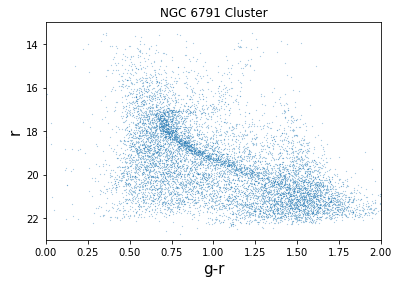

In [12]:
# Plot: NGC_6791

#Same as M13, we remove the spurious data.

spurious_g67 = np.where(g_NGC_6791 < 90.0) 

#Then, remake the arrays of our plot by reassigning the variables as below for g

g_NGC_6791 = g_NGC_6791[spurious_g67]
r_NGC_6791 = r_NGC_6791[spurious_g67]

#Now for r

spurious_r67 = np.where(r_NGC_6791 < 90.0)

g_NGC_6791 = g_NGC_6791[spurious_r67]
r_NGC_6791 = r_NGC_6791[spurious_r67]

#Reassign g-r array

g_r_NGC_6791 = g_NGC_6791-r_NGC_6791

plt.scatter(g_r_NGC_6791,r_NGC_6791,s=0.02)

plt.xlim(0.0,2.0)
plt.ylim(23.0,13.0)
plt.xlabel('g-r',fontsize=15)
plt.ylabel('r',fontsize=15)
plt.title('NGC 6791 Cluster')

#Notice how chaotic the population of stars is. 
#This can be due to an external population of stars (i.e. not original members of the stellar cluster) that have formed at different times to the main stellar cluster 
#However, there is still a strong density that forms the shape of the main seequence.

## Model Task Four

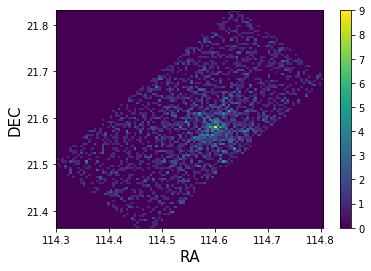

In [13]:

# Firstly, for this task we will need to import additional columns from our files for each cluster (the RA and DEC columns). 
# All we need to do is repeat task one to import the RA and DEC columns.

ra_ind = headers.index('RA')
dec_ind = headers.index('DEC')

NGC_2420ra = NGC_2420_data[:,ra_ind]
NGC_2420dec = NGC_2420_data[:,dec_ind]

# Using the indicies we produced from the M13 np.where() conditions earlier.

NGC_2420ra = NGC_2420ra[spurious_g24]
NGC_2420dec = NGC_2420dec[spurious_g24]

#Again for r

NGC_2420ra = NGC_2420ra[spurious_r24]
NGC_2420dec = NGC_2420dec[spurious_r24]

# We will want to use the matplotlib.pyplot.hist2d() module.
# We have already imported matplotlib.pyplot as plt, so, to call the hist2d module we will start with 'plt.hist2d()'.

plt.hist2d(NGC_2420ra,NGC_2420dec,bins=100.0)
plt.colorbar()
plt.xlabel('RA',size=15)
plt.ylabel('DEC',size=15)
#plt.scatter(NGC_2420ra,NGC_2420dec,s=0.2)
#plt.xlim(250.25,250.45)
#plt.ylim(36.27,36.58)

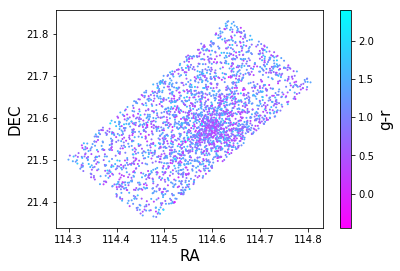

In [14]:
# The next step is to reproduce the plot above as a scatter plot instad of a 2D histogram. 
# We can then overlay the stars with colours that respond to their g-r values.

#So, using the same variables we declared above we shall use plt.scatter()

# Using the 'c' parameter, this will define what colour each individual data point is
# 'cmap' is the colour map that defines what the colour palette will be (see here for the full list: https://matplotlib.org/users/colormaps.html).
plt.scatter(NGC_2420ra,NGC_2420dec,c=g_r_NGC_2420,cmap='cool_r',s=1.0)
# Call the colourbar and assign it variable
scbar = plt.colorbar()
# Now set the colorbar a label so we know what it represents.
scbar.set_label('g-r',size=15)

plt.xlabel('RA',size=15)
plt.ylabel('DEC',size=15)
